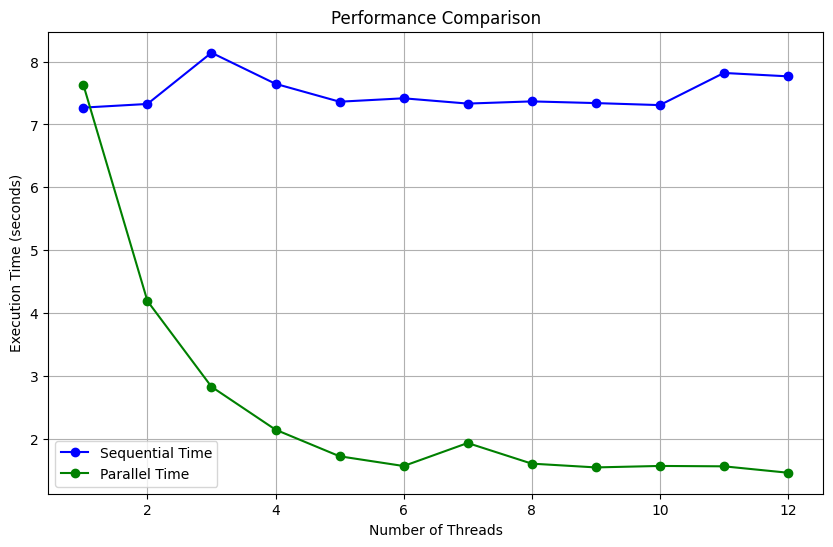

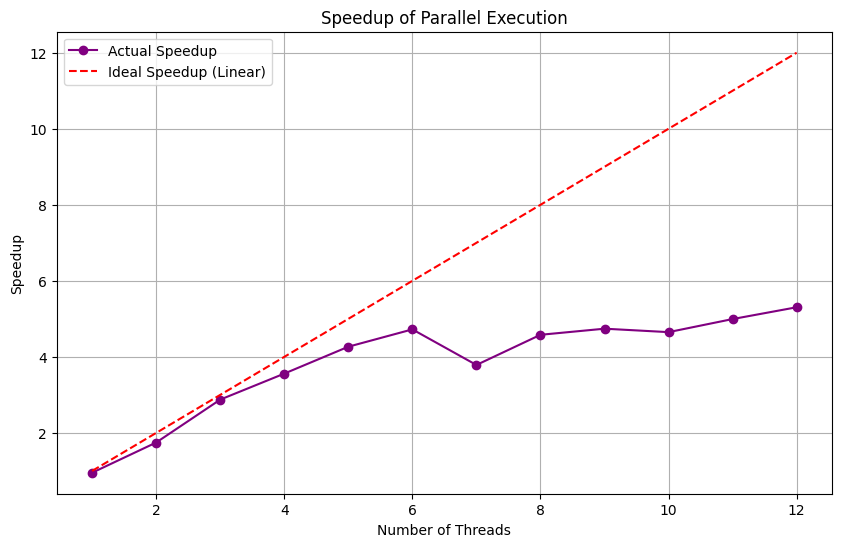

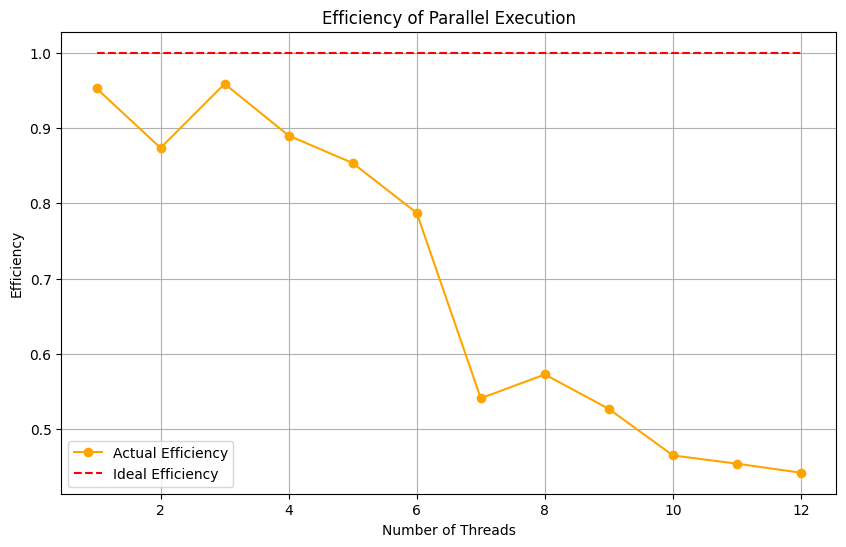

,sequencial,parallalel,efficiency,speedup
9,7.267869,7.629108,0.952650,0.952650
19,7.325752,4.193078,0.873553,1.747106
29,8.140244,2.830442,0.958654,2.875962
39,7.645906,2.147909,0.889924,3.559697
49,7.361624,1.725175,0.853435,4.267175
59,7.415692,1.570128,0.787164,4.722986
69,7.331809,1.936142,0.540973,3.786814
79,7.366557,1.608180,0.572585,4.580679
89,7.339694,1.548083,0.526794,4.741150
99,7.307531,1.571339,0.465051,4.650512


In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('./output.csv')

# Filter data to only keep rows with steps = 1,000,000,000
df = df[df['steps'] == 1000000000]

# Performance Chart
plt.figure(figsize=(10, 6))
plt.plot(df['threads'], df['seq'], label='Sequential Time', color='blue', marker='o')
plt.plot(df['threads'], df['par'], label='Parallel Time', color='green', marker='o')
plt.xlabel('Number of Threads')
plt.ylabel('Execution Time (seconds)')
plt.title('Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Calculate Speedup and Efficiency
df['speedup'] = df['seq'] / df['par']
df['efficiency'] = df['speedup'] / df['threads']

# Speedup Chart with Ideal Speedup Line
plt.figure(figsize=(10, 6))
plt.plot(df['threads'], df['speedup'], label='Actual Speedup', color='purple', marker='o')
plt.plot(df['threads'], df['threads'], label='Ideal Speedup (Linear)', color='red', linestyle='--')
plt.xlabel('Number of Threads')
plt.ylabel('Speedup')
plt.title('Speedup of Parallel Execution')
plt.legend()
plt.grid(True)
plt.show()

# Efficiency Chart with Ideal Efficiency Line
plt.figure(figsize=(10, 6))
plt.plot(df['threads'], df['efficiency'], label='Actual Efficiency', color='orange', marker='o')
plt.plot(df['threads'], [1] * len(df['threads']), label='Ideal Efficiency', color='red', linestyle='--')
plt.xlabel('Number of Threads')
plt.ylabel('Efficiency')
plt.title('Efficiency of Parallel Execution')
plt.legend()
plt.grid(True)
plt.show()

df[['seq', 'par', 'efficiency', 'speedup']].rename(columns={'seq': "sequencial", 'par': "parallalel"}).head(12)


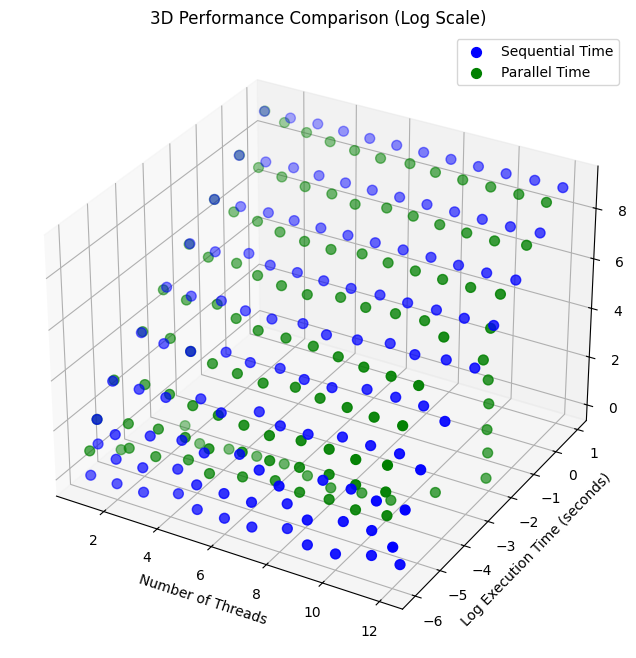

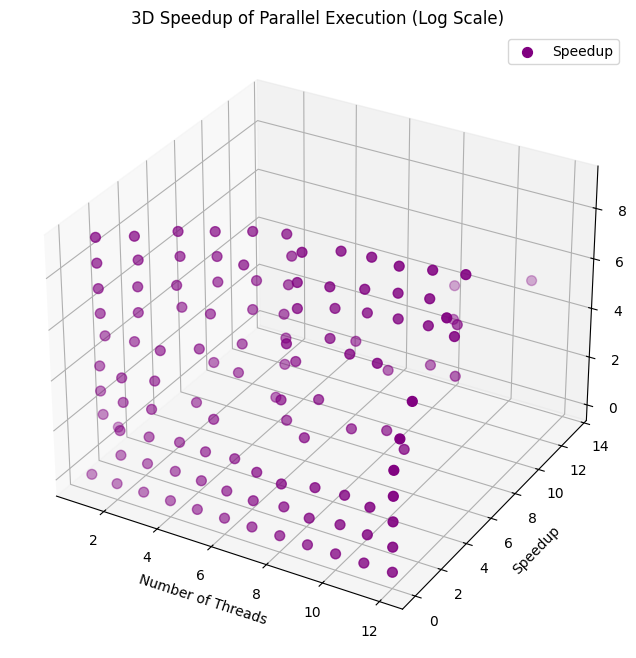

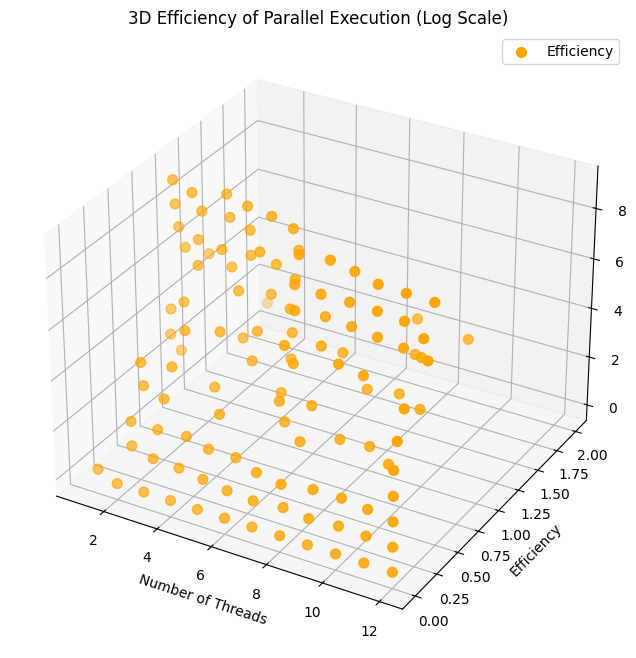

In [7]:
# Import necessary libraries for 3D plotting
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the data
# Replace 'data.csv' with your actual file path
df = pd.read_csv('output.csv')

# 3D Performance Chart with Log Scale for better clarity
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['threads'], np.log10(df['seq']), np.log10(df['steps']), label='Sequential Time', color='blue', s=50)
ax.scatter(df['threads'], np.log10(df['par']), np.log10(df['steps']), label='Parallel Time', color='green', s=50)
ax.set_xlabel('Number of Threads')
ax.set_ylabel('Log Execution Time (seconds)')
ax.set_zlabel('Log Number of Steps')
ax.set_title('3D Performance Comparison (Log Scale)')
ax.legend()
plt.show()

# Calculate Speedup and Efficiency
df['speedup'] = df['seq'] / df['par']
df['efficiency'] = df['speedup'] / df['threads']

# 3D Speedup Chart with Log Scale
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['threads'], df['speedup'], np.log10(df['steps']), label='Speedup', color='purple', s=50)
ax.set_xlabel('Number of Threads')
ax.set_ylabel('Speedup')
ax.set_zlabel('Log Number of Steps')
ax.set_title('3D Speedup of Parallel Execution (Log Scale)')
ax.legend()
plt.show()

# 3D Efficiency Chart with Log Scale
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['threads'], df['efficiency'], np.log10(df['steps']), label='Efficiency', color='orange', s=50)
ax.set_xlabel('Number of Threads')
ax.set_ylabel('Efficiency')
ax.set_zlabel('Log Number of Steps')
ax.set_title('3D Efficiency of Parallel Execution (Log Scale)')
ax.legend()
plt.show()
